---------------------------------DATA PREPROCESSING---------------------------------

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

import datasets.data as data
from descent_algorithms import *
from models import *
from util import *

In [2]:
features, labels = data.load_wisconsin_breast_cancer()
wbc_X_train, wbc_X_test, wbc_y_train, wbc_y_test = train_test_split(
    features, labels, test_size=0.2)

cod_features, cod_labels = data.load_cod_rna()
cod_X_train, cod_X_test, cod_y_train, cod_y_test = train_test_split(
    cod_features, cod_labels, test_size = 0.2)

In [3]:
rl_conv = 0.0000000

In [4]:
#Learning Rate Objects
lr = FixedRate(0.00001)

In [5]:
gd = GradientDescent()

#num = 20000
#wbc_X_train = wbc_X_train[0:num]
#wbc_X_test = wbc_X_test[0:num]
#wbc_y_train = wbc_y_train[0:num]
#wbc_y_test = wbc_y_test[0:num]
print(wbc_y_train.shape)
X = np.array([
    [-2, -4],
    [-4, -1],
    [1, 6],
    [2, 4],
    [6, 2]
])

y = np.array([-1,-1,1,1,1])
y = y.reshape((y.shape[0], 1))

wbc_y_train_svm = zero_one_labels_to_signed(wbc_y_train)
svm = SVM(gd, FixedRate(0.1), 1, 100, X.shape[0], rl_conv)
loss = svm.fit(X, y, non_zero_init = False)

(558, 1)
Iter:        0 train loss: 5.140
Iter:       10 train loss: 0.625
Iter:       20 train loss: 0.089
Iter:       30 train loss: 0.573
Iter:       40 train loss: 0.849
Iter:       50 train loss: 0.947
Iter:       60 train loss: 0.982
Iter:       70 train loss: 0.994
Iter:       80 train loss: 0.998
Iter:       90 train loss: 0.999


In [6]:
wbc_y_test_svm = zero_one_labels_to_signed(wbc_y_test)
acc = check_accuracy_svm(svm, X, y)
print("Model Accuracy: {0:.2f}%".format(acc * 100))

[[4.42689981e-05]
 [5.01715312e-05]]
[[0.]
 [0.]
 [1.]
 [1.]
 [1.]]
Model Accuracy: 60.00%


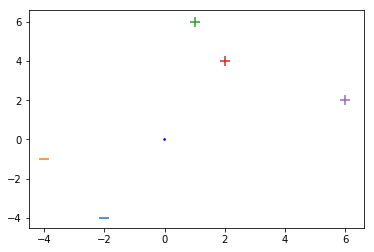

In [7]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples
w = svm.w

# Print the hyperplane calculated by svm_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')

In [8]:
#Descent Algorithm Objects
gd = GradientDescent()
gd1 = GradientDescent()
gd2 = GradientDescent()
# gd = StochasticVarianceReducedGradientDescent()
# gd = NesterovAcceleratedDescent()

In [9]:
#Models(descent_algo, learning rate, iterations, batch, relative convergence)
logreg = LogisticRegression(gd, lr, 25000, wbc_X_train.shape[0], rl_conv)

In [10]:
loss = logreg.fit(wbc_X_train, wbc_y_train)

Iter:        0 train loss: 386.760
Iter:     2500 train loss: 364.650
Iter:     5000 train loss: 356.702
Iter:     7500 train loss: 351.483
Iter:    10000 train loss: 346.991
Iter:    12500 train loss: 342.818
Iter:    15000 train loss: 338.867
Iter:    17500 train loss: 335.107
Iter:    20000 train loss: 331.523
Iter:    22500 train loss: 328.104


In [11]:
#modelAccuracyCheck
acc = check_accuracy(logreg, wbc_X_test, wbc_y_test)
print("Model Accuracy: {0:.2f}%".format(acc * 100))

acc = check_accuracy(cod_logreg, cod_X_test, cod_y_test)
print("Model Accuracy: {0:.2f}%".format(acc * 100))

acc = check_accuracy(MNIST_logreg, MNIST_X_test, MNIST_y_test)
print("Model Accuracy: {0:.2f}%".format(acc * 100))



NameError: name 'check_accuracy' is not defined

In [ ]:
import matplotlib.pyplot as plt
# plt.figure(200)
# plt.title('Training Accuracy')
# plt.xlabel('Iteration x10^2')
# plt.ylabel('Accuracy')
# plt.plot(accuracies, 'b')
# plt.show()
# plt.figure(300)
# plt.title('Validation Accuracy')
# plt.xlabel('Iteration x10^2')
# plt.ylabel('Accuracy')
# plt.plot(val_accuracies, 'b')
# plt.show()
plt.figure(1, figsize=(12, 6))
plt.title('Loss Plot')
plt.xlabel('Iteration Number')
plt.ylabel('Loss')
plt.plot(loss, 'b')
plt.show()